# Coleman Policy Iteration

## Contents

- [Coleman Policy Iteration](#Coleman-Policy-Iteration)  
  - [Overview](#Overview)  
  - [The Euler Equation](#The-Euler-Equation)  
  - [Comparison with Value Function Iteration](#Comparison-with-Value-Function-Iteration)  
  - [Implementation](#Implementation)  
  - [Exercises](#Exercises)  
  - [Solutions](#Solutions)  

## Overview

In this lecture we'll continue our [earlier study](https://lectures.quantecon.org/py/optgrowth.html) of the stochastic optimal growth model

In that lecture we solved the associated discounted dynamic programming problem using *value function iteration*

The beauty of this technique is its broad applicability

With numerical methods, however, we can often improve upon broadly applicable methods in specific applications by deriving alternative methods that are carefully tailored to the application at hand

This stands to reason, since each application comes with its own peculiar  structure that can potentially be exploited to produce a faster or more accurate algorithm

The stochastic optimal growth model has plenty of structure to exploit, especially when we adopt some concavity and smoothness assumptions about primitives

Here we exploit this structure via an **Euler equation**

It can be manipulated to produce a solution method that's typically faster and more accurate than value function iteration

We call this method Coleman policy iteration to  acknowledge the pioneering work of Wilbur John Coleman ([Col90](https://lectures.quantecon.org/py/zreferences.html#coleman1990))

(Note: *Coleman* policy iteration differs from *Howard's* policy iteration method --- an algorithm we'll get to later on)

## The Euler Equation

Let's take the model set out in [the previous lecture](https://lectures.quantecon.org/py/optgrowth.html) and add the assumptions that

1. $ u $ and $ f $ are continuously differentiable and strictly concave  
1. $ u'(c) \to \infty $ as $ c \to 0 $  


Recall the Bellman equation


$$
v^*(y) = \max_{0 \leq c \leq y}
    \left\{
        u(c) + \beta \int v^*(f(y - c) z) \phi(dz)
    \right\}
\quad \text{for all} \quad
y \in \mathbb R_+
$$

Let the optimal consumption policy be denoted by $ c^* $

We know that $ c^* $ is the unique $ v^* $ greedy policy, so that $ c^*(y) $ is the maximizer in the Bellman equation

Hence it satisfies the first order condition


$$
u'(c^*(y)) = \beta \int (v^*)'(f(y - c^*(y)) z) f'(y - c^*(y)) z \phi(dz)
$$

Moreover, if we write the value function in the equivalent form

$$
v^*(y) = \max_{0 \leq k \leq y}
    \left\{
        u(y-k) + \beta \int v^*(f(k) z) \phi(dz)
    \right\},
$$

differentiate with respect to $ y $,  and then  evaluate at the optimum we get


$$
(v^*)'(y) = u' (c^*(y) ) := (u' \circ c^*)(y)
$$

This last equality uses the [envelope theorem](https://en.wikipedia.org/wiki/Envelope_theorem)

Combining this and the first-order condition gives the famous **Euler equation**


<a id='equation-cpi_euler'></a>
$$
(u'\circ c^*)(y)
= \beta \int (u'\circ c^*)(f(y - c^*(y)) z) f'(y - c^*(y)) z \phi(dz)
$$

If you want full proofs of what we've just discussed, see, for example, section 12.1 of [EDTC](http://johnstachurski.net/edtc.html)

### The Coleman Policy Operator

Recall the Bellman operator


<a id='equation-fcbell20_coleman'></a>
$$
Tw(y) := \max_{0 \leq c \leq y}
\left\{
    u(c) + \beta \int w(f(y - c) z) \phi(dz)
\right\}
$$

which acts in value function space

To implement Coleman policy iteration, we're now going to introduce a new operator $ K $, acting in policy function space, that

1. takes as its argument a continuous strictly increasing consumption policy $ \sigma \in \Sigma $ and  
1. returns a new function $ K\sigma $,  where $ K\sigma(y) $ is the $ c \in (0, \infty) $ that solves  



<a id='equation-cpi_coledef'></a>
$$
u'(c)
= \beta \int (u' \circ \sigma) (f(y - c) z ) f'(y - c) z \phi(dz)
$$

Here is the main idea.

Think of $ \sigma $ as your policy for
consumption tomorrow and now choose the best consumption $ c $ for
today

When you do this, your choice depends on $ y $, of course, and as we vary
$ y $ we map out a function for consumption today, which is $ K\sigma $

Thus,  $ K\sigma $ is the consumption policy that the Euler equation tells
you to choose today when your future consumption policy is $ \sigma $

The  important thing to note about $ K $ is that, by
construction, the optimal policy $ c^* $ is a fixed point

Indeed, for fixed $ y $, the value $ Kc^*(y) $ is the $ c $ that
solves

$$
u'(c)
= \beta \int (u' \circ c^*) (f(y - c) z ) f'(y - c) z \phi(dz)
\quad \quad (\star)
$$

In view of the Euler equation, this is exactly $ c^*(y) $

### Is the Coleman Operator Well Defined?

In particular, is there always a unique $ c $ that solves
$(\star)$?

The answer is yes, under our assumptions

For any continuous, strictly increasing $ \sigma \in \Sigma $, the right side of $(\star)$

- is continuous and strictly increasing in $ c $ on $ (0, y) $  
- diverges to $ +\infty $ as $ c \to y $  


The left side of $(\star) $

- is continuous and strictly decreasing in $ c $ on $ (0, y) $  
- diverges to $ +\infty $ as $ c \to 0 $  


Sketching these curves and using the information above will convince you that they cross exactly once as $ c $ ranges over $ (0, y) $

## Comparison with Value Function Iteration

How does Coleman policy iteration compare with value function iteration?

Both can be used to compute the optimal policy, but is one faster or more
accurate?

There are two parts to this story

First, on a theoretical level, the two methods are essentially isomorphic

In particular, they converge at  the same rate

We'll prove this in just a moment

The other side to the story is the speed of the numerical implementation

It turns out that, once we actually implement these two routines, Coleman policy iteration is faster and more accurate than value function iteration

More on this below

### Equivalent Dynamics

Let's talk about the theory first

To explain the connection between the two algorithms, it helps to understand
the notion of equivalent dynamics (this concept is very helpful in other context as well)

Suppose that we have a function $ g \colon X \to X $ where $ X $ is a given set

The pair $ (X, g) $ is sometimes called a **dynamical system** and we
associate it with trajectories of the form

$$
x_{t+1} = g(x_t), \qquad x_0 \text{ given}
$$

Equivalently, $ x_t = g^t(x_0) $, where $ g $ is the $ t $-th
composition of $ g $ with itself

Here's the picture

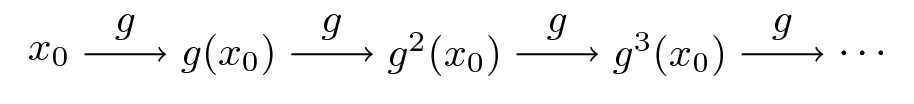

In [18]:
from IPython.display import Image
Image("col_pol_composition.png", width=450)

Now let another function $ h \colon Y \to Y $ where $ Y $ is another set

Suppose further that

- there exists a bijection $ \tau $ from $ X $ to $ Y $  
- the two functions **commute** under $ \tau $, which is to say that
  $ \tau(g(x)) = h (\tau(x)) $ for all $ x \in X $  


The last statement can be written more simply as

$$
\tau \circ g = h \circ \tau
$$

or, by applying $ \tau^{-1} $ to both sides

$$
g = \tau^{-1} \circ h \circ \tau
$$

Here's a commutative diagram that illustrates

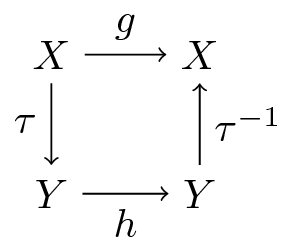

In [17]:
from IPython.display import Image
Image("col_pol_bij1.png", width=150)

 Here's a similar figure that traces out the action of the maps on a point
$ x \in X $

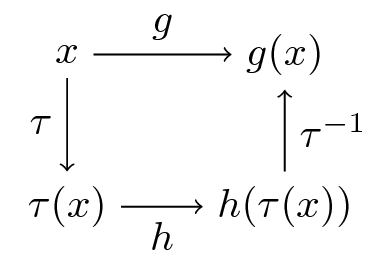

In [21]:
from IPython.display import Image
Image("col_pol_bij2.png", width=200)

 Now, it's easy to check that $ g^2 = \tau^{-1} \circ h^2 \circ \tau $ holds

In fact, if you like proofs by induction, you won't have trouble showing that

$$
g^n = \tau^{-1} \circ h^n \circ \tau
$$

is valid for all $ n $

What does this tell us?

It tells us that the following are equivalent

- iterate $ n $ times with $ g $, starting at $ x $  
- shift $ x $ to $ Y $ using $ \tau $,  iterate $ n $ times with $ h $ starting at $ \tau(x) $, and shift the result $ h^n(\tau(x)) $ back to $ X $ using $ \tau^{-1} $  


We end up with exactly the same object

### Back to Economics

Have you guessed where this is leading?

What we're going to show now is that the operators $ T $ and $ K $
commute under a certain bijection

The implication is that they have exactly the same rate of convergence

The bijection in question is the map $ M $ from value function to policy
function space defined by $ M v := (u')^{-1} \circ v' $, or equivalently

$$
M v(y) := (u')^{-1} [ ( v'(y)) ]
$$

for all $ y \in (0, \infty) $

It is an exercise (see below) to show that $ T $ and $ K $ commute
under $ M $, in the sense that


$$
M \circ T = K \circ M
$$

In view of the preceding discussion, this implies that

$$
T^n = M^{-1} \circ K^n \circ M
$$

which in turn implies that $ T $ and $ K $ converge at the same rate

## Implementation

We've just shown that the operators $ T $ and $ K $ have exactly the same rate of convergence

However, it turns out that, once numerical approximation is taken into account, the image of policy functions under $ K $ can be calculated faster and with greater accuracy than the image of value functions under $ T $

Although we haven't tested this, our intuition for this result is that

- the Coleman operator exploits more information because it uses first order and envelope conditions  
- root finding is often numerically more stable than optimization  
- policy functions generally have less curvature than value functions, and hence admit more accurate approximations based on grid point information  

### The Operator

Here's some code that implements the Coleman operator

In [27]:
"""
Filename: coleman.py
Authors: John Stachurski, Thomas Sargent

Solving the optimal growth problem via Coleman policy function iteration.  
The model is described in 

    http://lectures.quantecon.org/py/coleman_policy_iter.html
"""

import numpy as np
from scipy.optimize import brentq


def coleman_operator(g, grid, beta, u_prime, f, f_prime, shocks, Kg=None):
    """
    The approximate Coleman operator, which takes an existing guess g of the
    optimal consumption policy and computes and returns the updated function
    Kg on the grid points.  An array to store the new set of values Kg is
    optionally supplied (to avoid having to allocate new arrays at each
    iteration).  If supplied, any existing data in Kg will be overwritten.

    Parameters
    ----------
    g : array_like(float, ndim=1)
        The value of the input policy function on grid points
    grid : array_like(float, ndim=1)
        The set of grid points
    beta : scalar
        The discount factor
    u_prime : function
        The derivative u'(c) of the utility function
    f : function
        The production function f(k)
    f_prime : function
        The derivative f'(k)
    shocks : numpy array
        An array of draws from the shock, for Monte Carlo integration (to
        compute expectations).
    Kg : array_like(float, ndim=1) optional (default=None)
        Array to write output values to

    """
    # === Apply linear interpolation to g === #
    g_func = lambda x: np.interp(x, grid, g)

    # == Initialize Kg if necessary == #
    if Kg is None:
        Kg = np.empty_like(g)

    # == solve for updated consumption value
    for i, y in enumerate(grid):
        def h(c):
            vals = u_prime(g_func(f(y - c) * shocks)) * f_prime(y - c) * shocks
            return u_prime(c) - beta * np.mean(vals)
        c_star = brentq(h, 1e-10, y - 1e-10)
        Kg[i] = c_star

    return Kg

It has some similarities to the code for the Bellman operator in our [optimal growth lecture](https://lectures.quantecon.org/py/optgrowth.html)

For example, it evaluates integrals by Monte Carlo and approximates functions using linear interpolation

Let's see that Bellman operator code again,  since we'll use it in some tests below

In [25]:
"""
Filename: optgrowth.py
Authors: John Stachurski, Thomas Sargent

Solving the optimal growth problem via value function iteration.  The model is
described in 

    http://quant-econ.net/py/optgrowth.html
"""

import numpy as np
from scipy.optimize import fminbound


def bellman_operator(w, grid, beta, u, f, shocks, Tw=None, compute_policy=0):
    """
    The approximate Bellman operator, which computes and returns the
    updated value function Tw on the grid points.  An array to store
    the new set of values Tw is optionally supplied (to avoid having to
    allocate new arrays at each iteration).  If supplied, any existing data in 
    Tw will be overwritten.

    Parameters
    ----------
    w : array_like(float, ndim=1)
        The value of the input function on different grid points
    grid : array_like(float, ndim=1)
        The set of grid points
    beta : scalar
        The discount factor
    u : function
        The utility function
    f : function
        The production function
    shocks : numpy array
        An array of draws from the shock, for Monte Carlo integration (to
        compute expectations).
    Tw : array_like(float, ndim=1) optional (default=None)
        Array to write output values to
    compute_policy : Boolean, optional (default=False)
        Whether or not to compute policy function

    """
    # === Apply linear interpolation to w === #
    w_func = lambda x: np.interp(x, grid, w)

    # == Initialize Tw if necessary == #
    if Tw is None:
        Tw = np.empty_like(w)

    if compute_policy:
        sigma = np.empty_like(w)

    # == set Tw[i] = max_c { u(c) + beta E w(f(y  - c) z)} == #
    for i, y in enumerate(grid):
        def objective(c):
            return - u(c) - beta * np.mean(w_func(f(y - c) * shocks))
        c_star = fminbound(objective, 1e-10, y)
        if compute_policy:
            sigma[i] = c_star
        Tw[i] = - objective(c_star)

    if compute_policy:
        return Tw, sigma
    else:
        return Tw

### Testing on the Log / Cobb--Douglas case

As we [did for value function iteration](https://lectures.quantecon.org/py/optgrowth.html), let's start by
testing our method in the presence of a model that does have an analytical
solution

We assume the following imports

In [32]:
import matplotlib.pyplot as plt
import quantecon as qe

Now let's bring in the log-linear growth model we used in the
[value function iteration lecture](https://lectures.quantecon.org/py/optgrowth.html)

In [33]:
class LogLinearOG:
    """
    Log linear optimal growth model, with log utility, CD production and
    multiplicative lognormal shock, so that

        y = f(k, z) = z k^alpha

    with z ~ LN(mu, s).

    The class holds parameters and true value and policy functions.
    """

    def __init__(self, alpha=0.4, beta=0.96, mu=0, s=0.1):

        self.alpha, self.beta, self.mu, self.s = alpha, beta, mu, s 

        # == Some useful constants == #
        self.ab = alpha * beta
        self.c1 = np.log(1 - self.ab) / (1 - beta)
        self.c2 = (mu + alpha * np.log(self.ab)) / (1 - alpha)
        self.c3 = 1 / (1 - beta)
        self.c4 = 1 / (1 - self.ab)

    def u(self, c):
        " Utility "
        return np.log(c)

    def u_prime(self, c):
        return 1 / c

    def f(self, k):
        " Deterministic part of production function.  "
        return k**self.alpha

    def f_prime(self, k):
        return self.alpha * k**(self.alpha - 1)

    def c_star(self, y):
        " True optimal policy.  "
        return (1 - self.alpha * self.beta) * y

    def v_star(self, y):
        " True value function. "
        return self.c1 + self.c2 * (self.c3 - self.c4) + self.c4 * np.log(y)

Next we generate an instance

In [34]:
lg = LogLinearOG()

# == Unpack parameters / functions for convenience == #
alpha, beta, mu, s = lg.alpha, lg.beta, lg.mu, lg.s
v_star, c_star = lg.v_star, lg.c_star
u, u_prime, f, f_prime = lg.u, lg.u_prime, lg.f, lg.f_prime

We also need a grid and some shock draws for Monte Carlo integration

In [35]:
grid_max = 4         # Largest grid point
grid_size = 200      # Number of grid points
shock_size = 250     # Number of shock draws in Monte Carlo integral

grid = np.linspace(1e-5, grid_max, grid_size)
shocks = np.exp(mu + s * np.random.randn(shock_size))

As a preliminary test, let's see if $ K c^* = c^* $, as implied by the
theory

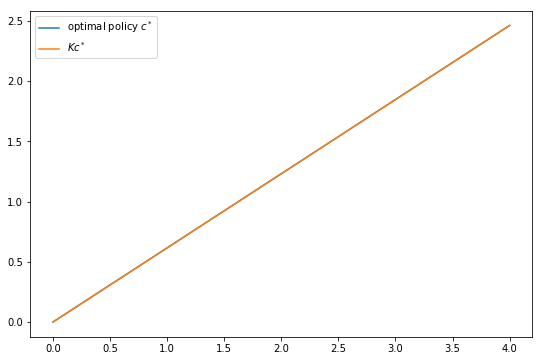

In [39]:
c_star_new = coleman_operator(c_star(grid),
            grid, beta, u_prime, f, f_prime, shocks)

fig, ax = plt.subplots(figsize=(9, 6))

ax.plot(grid, c_star(grid), label="optimal policy $c^*$")
ax.plot(grid, c_star_new, label="$Kc^*$")

ax.legend(loc='upper left')
plt.show()

We can't really distinguish the two plots, so we are looking good, at least
for this test

Next let's try iterating from an arbitrary initial condition and see if we
converge towards $ c^* $

The initial condition we'll use is the one that eats the whole pie: $ c(y) = y $

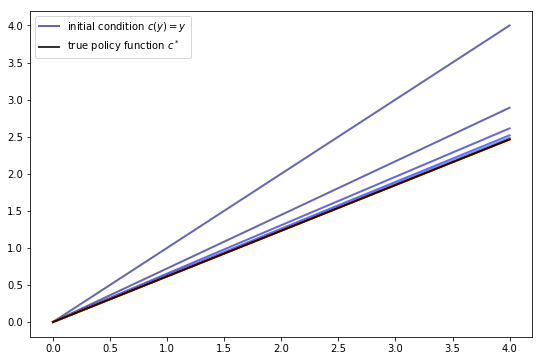

In [45]:
g = grid
n = 15
fig, ax = plt.subplots(figsize=(9, 6))
lb = 'initial condition $c(y) = y$'
ax.plot(grid, g, color=plt.cm.jet(0), lw=2, alpha=0.6, label=lb)
for i in range(n):
    new_g = coleman_operator(g, grid, beta, u_prime, f, f_prime, shocks)
    g = new_g
    ax.plot(grid, g, color=plt.cm.jet(i / n), lw=2, alpha=0.6)

lb = 'true policy function $c^*$'
ax.plot(grid, c_star(grid), 'k-', lw=2, alpha=0.8, label=lb)
ax.legend(loc='upper left')

plt.show()

We see that the policy has converged nicely, in only a few steps

Now let's compare the accuracy of iteration using the Coleman and Bellman operators

We'll generate

1. $ K^n c $ where $ c(y) = y $  
1. $ (M \circ T^n \circ M^{-1}) c $ where $ c(y) = y $  


In each case we'll compare the resulting policy to $ c^* $

The theory on equivalent dynamics says we will get the same policy function
and hence the same errors

But in fact we expect the first method to be more accurate for reasons
discussed above

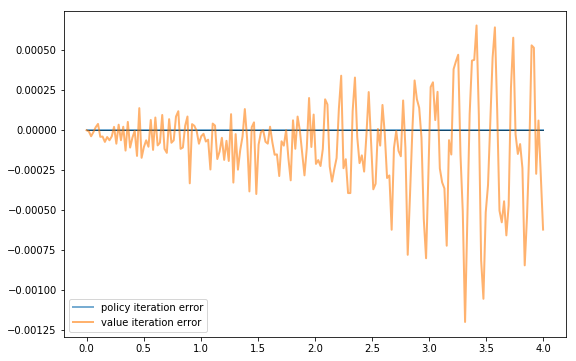

In [46]:
g_init = grid
w_init = u(grid)
sim_length = 20

g, w = g_init, w_init
for i in range(sim_length):
    new_g = coleman_operator(g, grid, beta, u_prime, f, f_prime, shocks)
    new_w = bellman_operator(w, grid, beta, u, f, shocks)
    g, w = new_g, new_w

new_w, vf_g = bellman_operator(w, grid, beta, u, f, shocks, compute_policy=True)

fig, ax = plt.subplots(figsize=(9,6))

pf_error = c_star(grid) - g
vf_error = vf_g - g

ax.plot(grid, 0 * grid, 'k-', lw=1)
ax.plot(grid, pf_error, lw=2, alpha=0.6, label="policy iteration error")
ax.plot(grid, vf_error, lw=2, alpha=0.6, label="value iteration error")

ax.legend(loc='lower left')
plt.show()

The above figure shows the errors in each case

As you can see, Coleman policy iteration is much more accurate for a given
number of iterations

## Exercises

### Exercise 1

Show that 

$$
M \circ T = K \circ M
$$

is valid.  In particular,

- Let $ v $ be strictly concave and continuously differentiable on $ (0, \infty) $  
- Fix $ y \in (0, \infty) $ and show that $ MTv(y) = KMv(y) $  

### Exercise 2

Consider the same model as above but with utility given by

$$
u(c) = \frac{c^{1 - \gamma} - 1}{1 - \gamma}
$$

Iterate 20 times with Bellman iteration and Coleman policy iteration

- start Coleman policy iteration from $ c(y) = y $  
- start value function iteration from $ v(y) = u(y) $  


Compare the resulting policies and check that they are close

### Exercise 3

Do the same exercise, but now, rather than plotting results, time how long 20
iterations takes in each case

## Solutions

### Solution to Exercise 1

Let $ T, K, M, v $ and $ y $ be as stated in the exercise

Using the envelope theorem, one can show that $ (Tv)'(y) = u'(c(y)) $
where $ c(y) $ solves


<a id='equation-cpi_foo'></a>
$$
u'(c(y))
= \beta \int v' (f(y - c(y)) z ) f'(y - c(y)) z \phi(dz)
$$

Hence $ MTv(y) = (u')^{-1} (u'(c(y))) = c(y) $

On the other hand, $ KMv(y) $ is the $ c(y) $ that solves

$$
\begin{align*}
    u'(c(y))
    & = \beta \int (u' \circ (Mv)) (f(y - c(y)) z ) f'(y - c(y)) z \phi(dz)
    \\
    & = \beta \int (u' \circ ((u')^{-1} \circ v'))
        (f(y - c(y)) z ) f'(y - c(y)) z \phi(dz)
    \\
    & = \beta \int v'(f(y - c(y)) z ) f'(y - c(y)) z \phi(dz)
\end{align*}
$$

We see that $ c(y) $ is the same in each case

### Solution to Exercise 2

Here's the code, which will execute if you've run all the code above

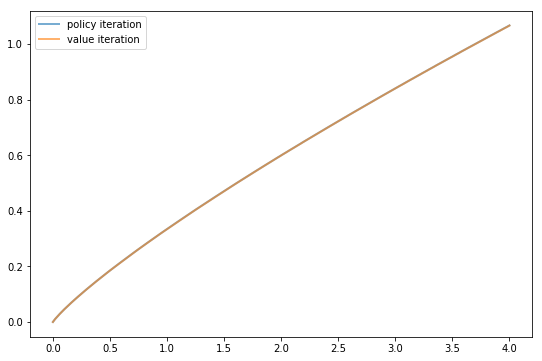

In [57]:
## Define the model

alpha = 0.65
beta = 0.95
mu = 0
s = 0.1
grid_min = 1e-6
grid_max = 4
grid_size = 200
shock_size = 250

gamma = 1.5   # Preference parameter

def f(k):
    return k**alpha

def f_prime(k):
    return alpha * k**(alpha - 1)

def u(c):
    return (c**(1 - gamma) - 1) / (1 - gamma)

def u_prime(c):
    return c**(-gamma)

grid = np.linspace(grid_min, grid_max, grid_size)
shocks = np.exp(mu + s * np.random.randn(shock_size))

## Let's make convenience functions based around these primitives

def crra_bellman(w):
    return bellman_operator(w, grid, beta, u, f, shocks)

def crra_coleman(g):
    return coleman_operator(g, grid, beta, u_prime, f, f_prime, shocks)

## Iterate with K and T, compare policies

g_init = grid
w_init = u(grid)
sim_length = 20

g, w = g_init, w_init
for i in range(sim_length):
    new_g = crra_coleman(g)
    new_w = crra_bellman(w)
    g, w = new_g, new_w

new_w, vf_g = bellman_operator(w, grid, beta, u, f, shocks, compute_policy=True)

fig, ax = plt.subplots(figsize=(9, 6))

ax.plot(grid, g, lw=2, alpha=0.6, label="policy iteration")
ax.plot(grid, vf_g, lw=2, alpha=0.6, label="value iteration")

ax.legend(loc="upper left")
plt.show()

The policies are indeed close

### Solution to Exercise 3

Here's the code

It assumes that you've just run the code from the previous exercise

In [58]:
g_init = grid
w_init = u(grid)
sim_length = 100

print("Timing value function iteration")

w = w_init
qe.util.tic()
for i in range(sim_length):
    new_w = crra_bellman(w)
    w = new_w
qe.util.toc()


print("Timing Coleman policy function iteration")

g = g_init
qe.util.tic()
for i in range(sim_length):
    new_g = crra_coleman(g)
    g = new_g
qe.util.toc()

Timing value function iteration
TOC: Elapsed: 8.595310926437378 seconds.
Timing Coleman policy function iteration
TOC: Elapsed: 7.899780511856079 seconds.


7.899780511856079

If you run this you'll find that the two operators execute at about the same speed

However, as we saw above, Coleman policy iteration is numerically far more accurate for a given number of iterations